## Regression Analysis for car prices

### 1. Look at the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# reading the dataset
car_prices_df = pd.read_csv("../data/car_prices.csv")

In [2]:
print(car_prices_df.shape)

(205, 26)


In [3]:
car_prices_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_prices_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
car_prices_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
# any missing data?
car_prices_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### 2. Clean the data

#### A. CarName

In [7]:
# check car type
car_prices_df['CarName'].head(20)

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
Name: CarName, dtype: object

In [8]:
# pick up first word as the car make
import re
pattern = re.compile(r'\w+-?\w+')
car_prices_df["car_make"] = car_prices_df['CarName'].apply(lambda x: re.findall(pattern, x)[0])
car_prices_df["car_make"].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_make, dtype: int64

In [9]:
# spell check
car_prices_df.loc[car_prices_df['car_make'] == "porcshce", 'car_make'] = 'porsche'
car_prices_df.loc[car_prices_df['car_make'] == "Nissan", 'car_make'] = 'nissan'
car_prices_df.loc[car_prices_df['car_make'] == "maxda", 'car_make'] = 'mazda'
car_prices_df.loc[car_prices_df['car_make'] == "toyouta", 'car_make'] = 'toyota'
car_prices_df.loc[(car_prices_df['car_make'] == "vw") | (car_prices_df['car_make'] == "vokswagen"), 'car_make'] = 'volkswagen'

car_prices_df["car_make"].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_make, dtype: int64

#### B. any non-numerical columns that can be made into dummies?

In [10]:
object_columns_df = car_prices_df.select_dtypes(include=['object'])
object_columns_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_make
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


#### C. symboling - is numerical - but a small set of values

In [11]:
car_prices_df['symboling'].describe()

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

In [12]:
car_prices_df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


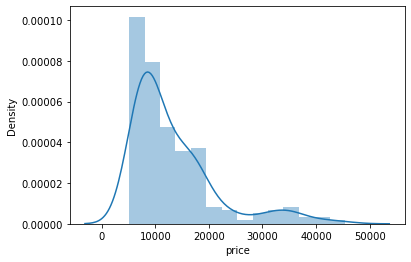

In [13]:
# plot the price distribution
sns.distplot(car_prices_df['price'])
plt.show()

In [14]:
# check the data ranges for any bad data
car_prices_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
# pick up the numeric columns
car_numeric_df = car_prices_df.select_dtypes(include=['float64', 'int'])
car_numeric_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
# dropping non numerics
car_numeric_df = car_numeric_df.drop(['car_ID'], axis=1, errors='ignore')
car_numeric_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
# create correlation matrix
cor_matrix = car_numeric_df.corr()
cor_matrix

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


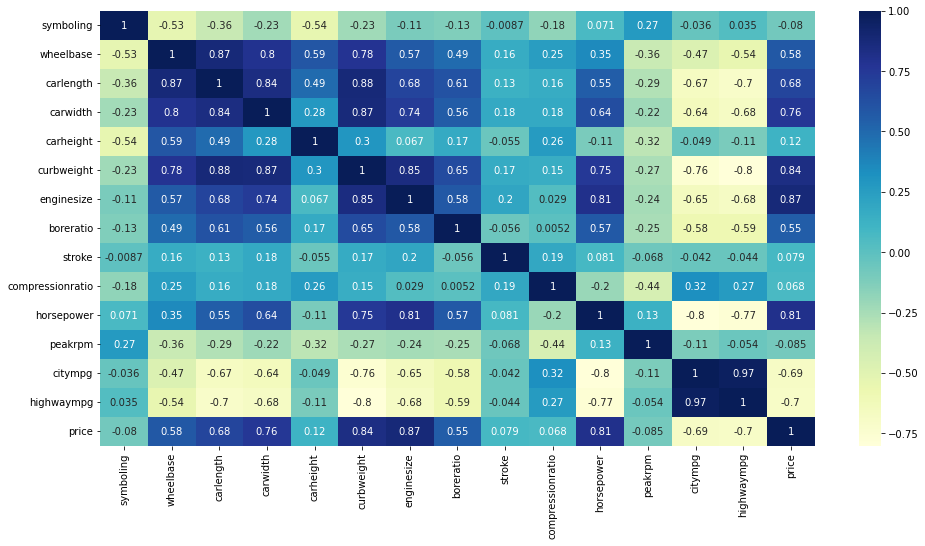

In [18]:
# heatmap
plt.figure(figsize=(16,8))
sns.heatmap(cor_matrix, cmap="YlGnBu", annot=True)
plt.show()


We can see for which variable price is positively correlated.
Also a few variables on the top left are correlated.

### 3. Create features

#### Convert some non numerics to numerical using dummies

In [19]:
# symboling can be a dummy 
# first make it an object type
car_prices_df['symboling'] = car_prices_df['symboling'].astype('object')
car_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [20]:
#remove symboling
car_prices_df = car_prices_df.drop('symboling', axis=1, errors='ignore')

In [21]:
# remove carName object - it cannot be a dummy
car_prices_df = car_prices_df.drop('CarName', axis=1, errors='ignore')

In [22]:
car_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

#### choose features

In [23]:
# choose predicates and result 

y = car_prices_df['price']

X = car_prices_df.loc[:, ['fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_make']]




In [24]:
# convert the categorical object columns to dummies

object_columns_df = X.select_dtypes(include=['object'])
object_columns_df.head()


,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_make
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [25]:
# make dummies
dummy_df = pd.get_dummies(object_columns_df, drop_first=True)
dummy_df.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,car_make_nissan,car_make_peugeot,car_make_plymouth,car_make_porsche,car_make_renault,car_make_saab,car_make_subaru,car_make_toyota,car_make_volkswagen,car_make_volvo
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# drop object columns from X  
X = X.drop(list(object_columns_df.columns), axis=1)

In [27]:
# add dummy variables to X
X = pd.concat([X, dummy_df], axis=1)

In [28]:
# list of all features
feature_columns = X.columns
print(feature_columns)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_make_audi', 'car_make_bmw',
       'car_make_buick', 'car_make_chevrolet', 'car_make_dodge',
       'car_make_honda', 'car_make_isuzu', 'car_make_jaguar', 'car_make_mazda

In [29]:
# scale the features
from sklearn.preprocessing import scale

scaled_X = pd.DataFrame(scale(X))

In [30]:
# add the columns back
scaled_X.columns = feature_columns
print("############ Scaled X ###########")
print(scaled_X[:2])
print("############ X ###########")
print(X[:2])

# reassign
X = scaled_X

############ Scaled X ###########
   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566    0.074449   
1  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566    0.074449   

   boreratio    stroke  compressionratio  horsepower  ...  car_make_nissan  \
0   0.519071 -1.839377         -0.288349    0.174483  ...        -0.310253   
1   0.519071 -1.839377         -0.288349    0.174483  ...        -0.310253   

   car_make_peugeot  car_make_plymouth  car_make_porsche  car_make_renault  \
0          -0.23812          -0.188025         -0.158114         -0.099258   
1          -0.23812          -0.188025         -0.158114         -0.099258   

   car_make_saab  car_make_subaru  car_make_toyota  car_make_volkswagen  \
0       -0.17364        -0.249351        -0.430083            -0.249351   
1       -0.17364        -0.249351        -0.430083            -0.249351   

   car_make_volvo  
0        -0.23812  
1        -0.2

### 4. Build Model

#### train test - 50/50

In [31]:
# train and test

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=44)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-0.5129562158914511

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


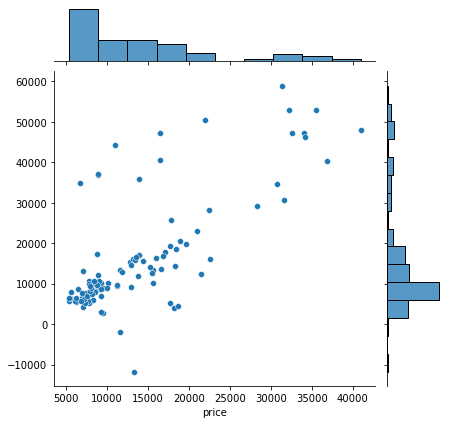

In [32]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat);

#### train test - 60/40

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=44)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.839590229328249

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


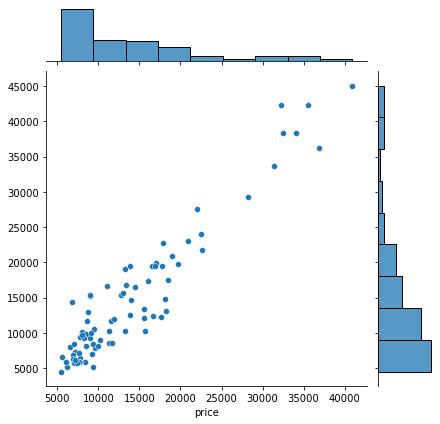

In [34]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat);

#### train test - 65/35

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=44)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8940731469896939

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


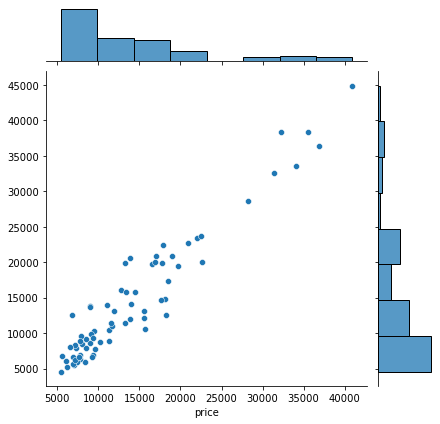

In [36]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat);

### Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [38]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print('------------------------------------\n')
    print('K: {}'.format(folds))
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=folds)
    print("Cross-validated scores: {}".format(scores))
    print("Mean CV R2: {}".format(np.mean(scores)))
    print('Std CV R2: {}'.format(np.std(scores)))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X, y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: {}".format(r2))

------------------------------------

K: 5
Cross-validated scores: [ 0.48049075  0.84258413 -0.36493429  0.35407799 -0.83839249]
Mean CV R2: 0.09476521698561165
Std CV R2: 0.6094862354519359
Cross-Predicted R2: 0.502691998261057
------------------------------------

K: 6
Cross-validated scores: [-2.49652579e+24 -4.02499821e+23  8.19032012e-01  4.17963717e-02
 -3.55293307e-01  9.32328517e-03]
Mean CV R2: -4.831709353594534e+23
Std CV R2: 9.123159371872468e+23
Cross-Predicted R2: -6.1025822695854e+23
------------------------------------

K: 7
Cross-validated scores: [-5.13447222e+22  6.75979328e-01  6.81375751e-01 -4.21520904e-01
 -5.24981641e+23 -1.90519027e-01  1.69430397e-01]
Mean CV R2: -8.233233764430779e+22
Std CV R2: 1.8157710187002056e+23
Cross-Predicted R2: -1.0478505454621714e+23
------------------------------------

K: 8
Cross-validated scores: [-7.52100702e+24 -5.74770859e+24  7.18875305e-01  6.37908869e-02
  9.77506489e-03 -8.26131982e+25  3.38549397e-01  4.76559064e-01]
Mea

In [42]:
predictions[:5]

array([1.43289761e+16, 1.43289761e+16, 1.43289761e+16, 1.40790019e+16,
       1.40790019e+16])

### get a simple linear regression equation

In [43]:
linear_reg_model = LinearRegression()

# fit training data
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [44]:
# get intercept + coefficients
print(linear_reg_model.coef_)
print(linear_reg_model.intercept_)

[ 1.42272857e+03 -9.76932952e+02  1.24754946e+03 -8.20516394e+02
  2.46321674e+03  5.68278982e+03 -1.65102999e+03  4.04152671e+02
 -4.45425202e+03 -6.75226016e+02  1.24212238e+03  7.68682778e+02
  2.84676822e+02 -2.37389380e+03  9.09569598e+02  1.00575006e+01
 -4.06141154e+02 -1.14230654e+03 -8.88007332e+02 -4.06831107e+02
 -4.64594385e+02 -9.15296831e+01  1.10764912e+03  2.27373675e-12
 -4.90980647e+02  1.12805648e+02  1.89241863e+01 -2.20612193e+02
  3.96958282e+02 -7.42944927e+02  1.86677268e+02 -4.71820466e+02
  5.82760953e+02 -4.03055045e+02  3.96958282e+02  1.23570932e+03
  4.57231960e+02  2.37389380e+03 -1.11108414e+02  4.90679557e+02
  6.86121919e+01  7.95807864e-13  7.10343419e+01  1.03103294e+03
 -3.36214634e+01 -8.34558172e+02 -1.63728948e+03 -1.22275417e+03
 -9.09494702e-13 -2.33853101e+02 -1.40366614e+03 -2.06323210e+02
 -2.22780677e+03 -1.57612993e+03 -6.91669893e+02 -1.38831973e+03
  8.62260551e+02 -7.09559503e+02  4.42049746e+01 -5.45597637e+02
 -2.03051306e+03 -1.03784

In [47]:
# Predict the y-values on the testing dataset & examine the first few
y_preds = [int(x) for x in linear_reg_model.predict(X_test)]
print(list(y_test[:5]))
print(y_preds[:5])

[19699.0, 8358.0, 7053.0, 8921.0, 7957.0]
[19462, 5900, 5544, 8590, 8480]


In [49]:
# r2
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_preds))

0.8940824179145388


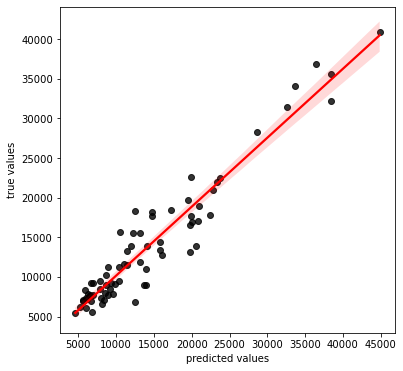

In [50]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [52]:
# root mean sq error
from math import sqrt
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

2639.323023738729

### optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.

In [40]:
len(X.columns)

63

In [ ]:
from itertools import combinations

combs = []
for i in range(1, len(X.columns)+1):
    for c in combinations(X.columns.tolist(), i):
        combs.append(c)
        
print(len(combs))

In [ ]:
linreg = LinearRegression()

R2_results = {}
for i,c in enumerate(combs):
    if (i % 250) == 0:
        print(i)
        
    subX = X[list(c)]
    R2_results[c] = np.mean(cross_val_score(linreg, subX, y))

In [ ]:
results = R2_results.items()
results = sorted(results, key=lambda x: x[1], reverse=True)

In [ ]:
for i in range(5):
    print(results[i])